# 기계학습

## 담당교수 : 장원중

#### 그래프 한글이 깨질때 & 마이너스 부호 사용

In [4]:
import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

# 결측치 처리

## 데이터 집합 읽어오기  

In [7]:
# 라이브러리 읽어오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [8]:
# 데이터 읽어오기 
sample_data = pd.read_excel(os.getcwd()+'/std_sample_data.xlsx')

# 데이터의 형상 
# - shape 속성 : 데이터의 (행, 열) 크기를 확인 
print(sample_data.shape)   # (500, 5)

(500, 5)


In [9]:
# 데이터 탐색
# info() 함수 : 데이터에 대한 전반적인 정보를 나타낸다. 

sample_data.info()

# 총 10개의 변수(컬럼), 100개의 데이터(row)를 가지고 있고 10개의 속성의 구성정보를 확인   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   성명       500 non-null    object 
 1   학년       500 non-null    int64  
 2   키(cm)    496 non-null    float64
 3   몸무게(kg)  497 non-null    float64
 4   취미       500 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [10]:
# 결측치 탐색 
# isnull() : 판다스 데이터프레임 및 시리즈의 결측치(NaN)를 탐색해 결측치에 대해 True를 반환한다. 

sample_data.isnull().sum()

성명         0
학년         0
키(cm)      4
몸무게(kg)    3
취미         0
dtype: int64

In [11]:
# 데이터 출력  

sample_data

,성명,학년,키(cm),몸무게(kg),취미
0,이서연,3,150.8,62.00000,탁구
1,장지민,3,181.1,84.30000,탁구
2,윤하윤,1,161.3,70.60000,골프
3,임수현,1,158.6,79.80000,달리기
4,정수현,3,182.9,80.40000,골프
...,...,...,...,...,...
495,장민수,1,184.5,59.20000,등산
496,최하윤,4,179.5,57.00000,축구
497,윤현우,2,188.7,63.80000,테니스
498,임지민,4,158.9,115.36752,탁구


## 결측치가 포함된 행만 필터링

In [13]:
# 결측치가 포함된 행만 필터링
missing_data_rows = sample_data[sample_data.isnull().any(axis=1)]

# 결측치가 포함된 행 출력
print(missing_data_rows)
#     성명  학년  키(cm)  몸무게(kg)  취미
#107  조지우   3  NaN     63.4       골프
#141  김지우   3  185.6   NaN      달리기
#192  이준호   3  178.6   NaN      달리기
#365  최지우   2  NaN     57.7      등산
#395  정하윤   4  NaN     68.0      골프
#450  김예은   3  NaN     56.3      수영
#454  장수현   3  181.0   NaN       등산

      성명  학년  키(cm)  몸무게(kg)   취미
107  조지우   3    NaN     63.4   골프
141  김지우   3  185.6      NaN  달리기
192  이준호   3  178.6      NaN  달리기
365  최지우   2    NaN     57.7   등산
395  정하윤   4    NaN     68.0   골프
450  김예은   3    NaN     56.3   수영
454  장수현   3  181.0      NaN   등산


## 결측치를 중앙값으로 대체

In [15]:
# 결측치를 중앙값으로 대체
sample_data_filled = sample_data.fillna(sample_data.median(numeric_only=True))

# 중앙값으로 대체한 데이터프레임 출력
print("DataFrame with missing values filled with median:")
print(sample_data_filled)

# 결측치가 포함된 행만 필터링
missing_data_rows = sample_data_filled[sample_data_filled.isnull().any(axis=1)]

# 결측치가 포함된 행 출력
print(missing_data_rows)

DataFrame with missing values filled with median:
      성명  학년  키(cm)    몸무게(kg)   취미
0    이서연   3  150.8   62.00000   탁구
1    장지민   3  181.1   84.30000   탁구
2    윤하윤   1  161.3   70.60000   골프
3    임수현   1  158.6   79.80000  달리기
4    정수현   3  182.9   80.40000   골프
..   ...  ..    ...        ...  ...
495  장민수   1  184.5   59.20000   등산
496  최하윤   4  179.5   57.00000   축구
497  윤현우   2  188.7   63.80000  테니스
498  임지민   4  158.9  115.36752   탁구
499  김예은   3  179.9   84.60000  달리기

[500 rows x 5 columns]
Empty DataFrame
Columns: [성명, 학년, 키(cm), 몸무게(kg), 취미]
Index: []


## 중앙값으로 대체한 데이터를 새로운 엑셀 파일로 저장

In [17]:
# 중앙값으로 대체한 데이터를 새로운 엑셀 파일로 저장
filled_file_path = os.getcwd()+'/std_sample_data_filled.xlsx'
sample_data_filled.to_excel(filled_file_path, index=False)

print(f"Filled data saved to {filled_file_path}")

Filled data saved to C:\Users\a0102\OneDrive\바탕 화면\기계학습\3주차_실습/std_sample_data_filled.xlsx


## 키 속성으로 히스토그램

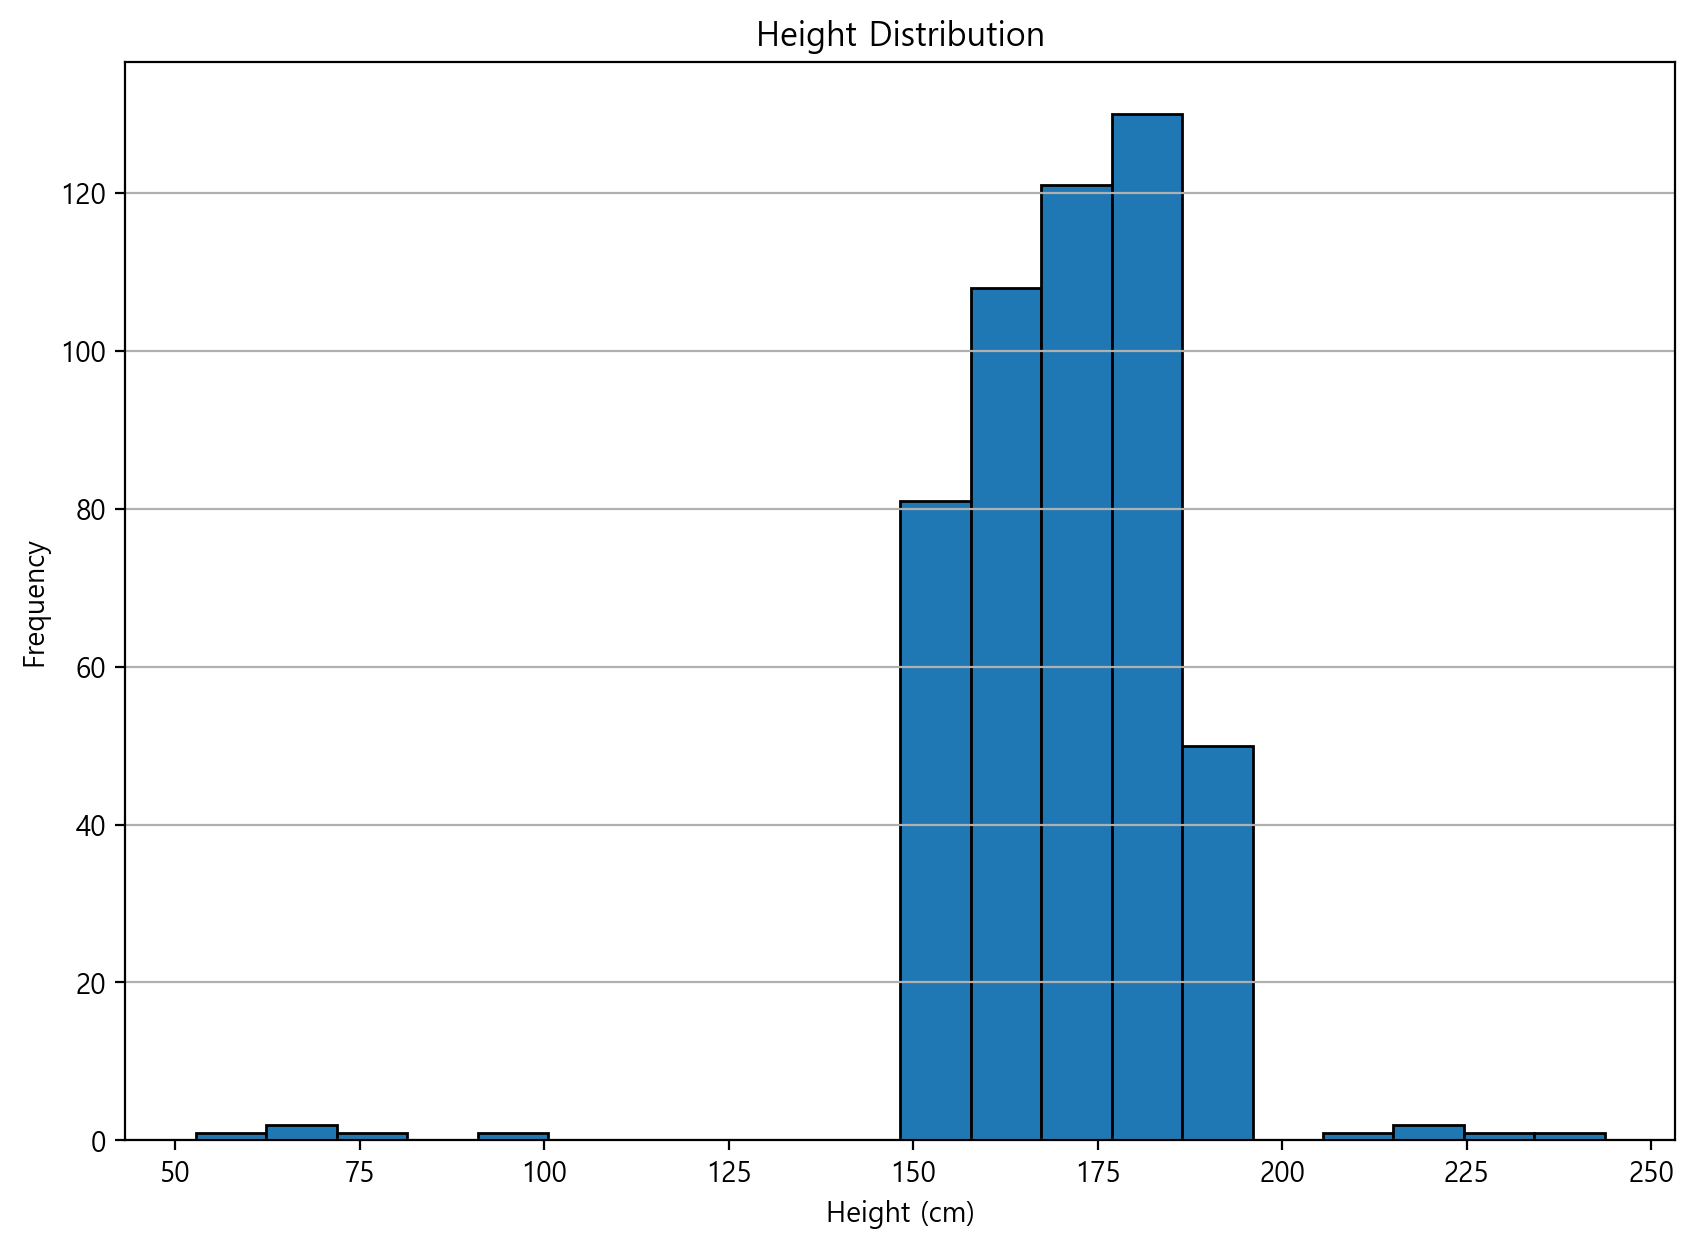

In [19]:
# 히스토그램 그리기
plt.figure(figsize=(10, 7))
plt.hist(sample_data_filled['키(cm)'], bins=20, edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y')

# 그래프 보여주기
plt.show()

## 몸무게 속성으로 히스토그램

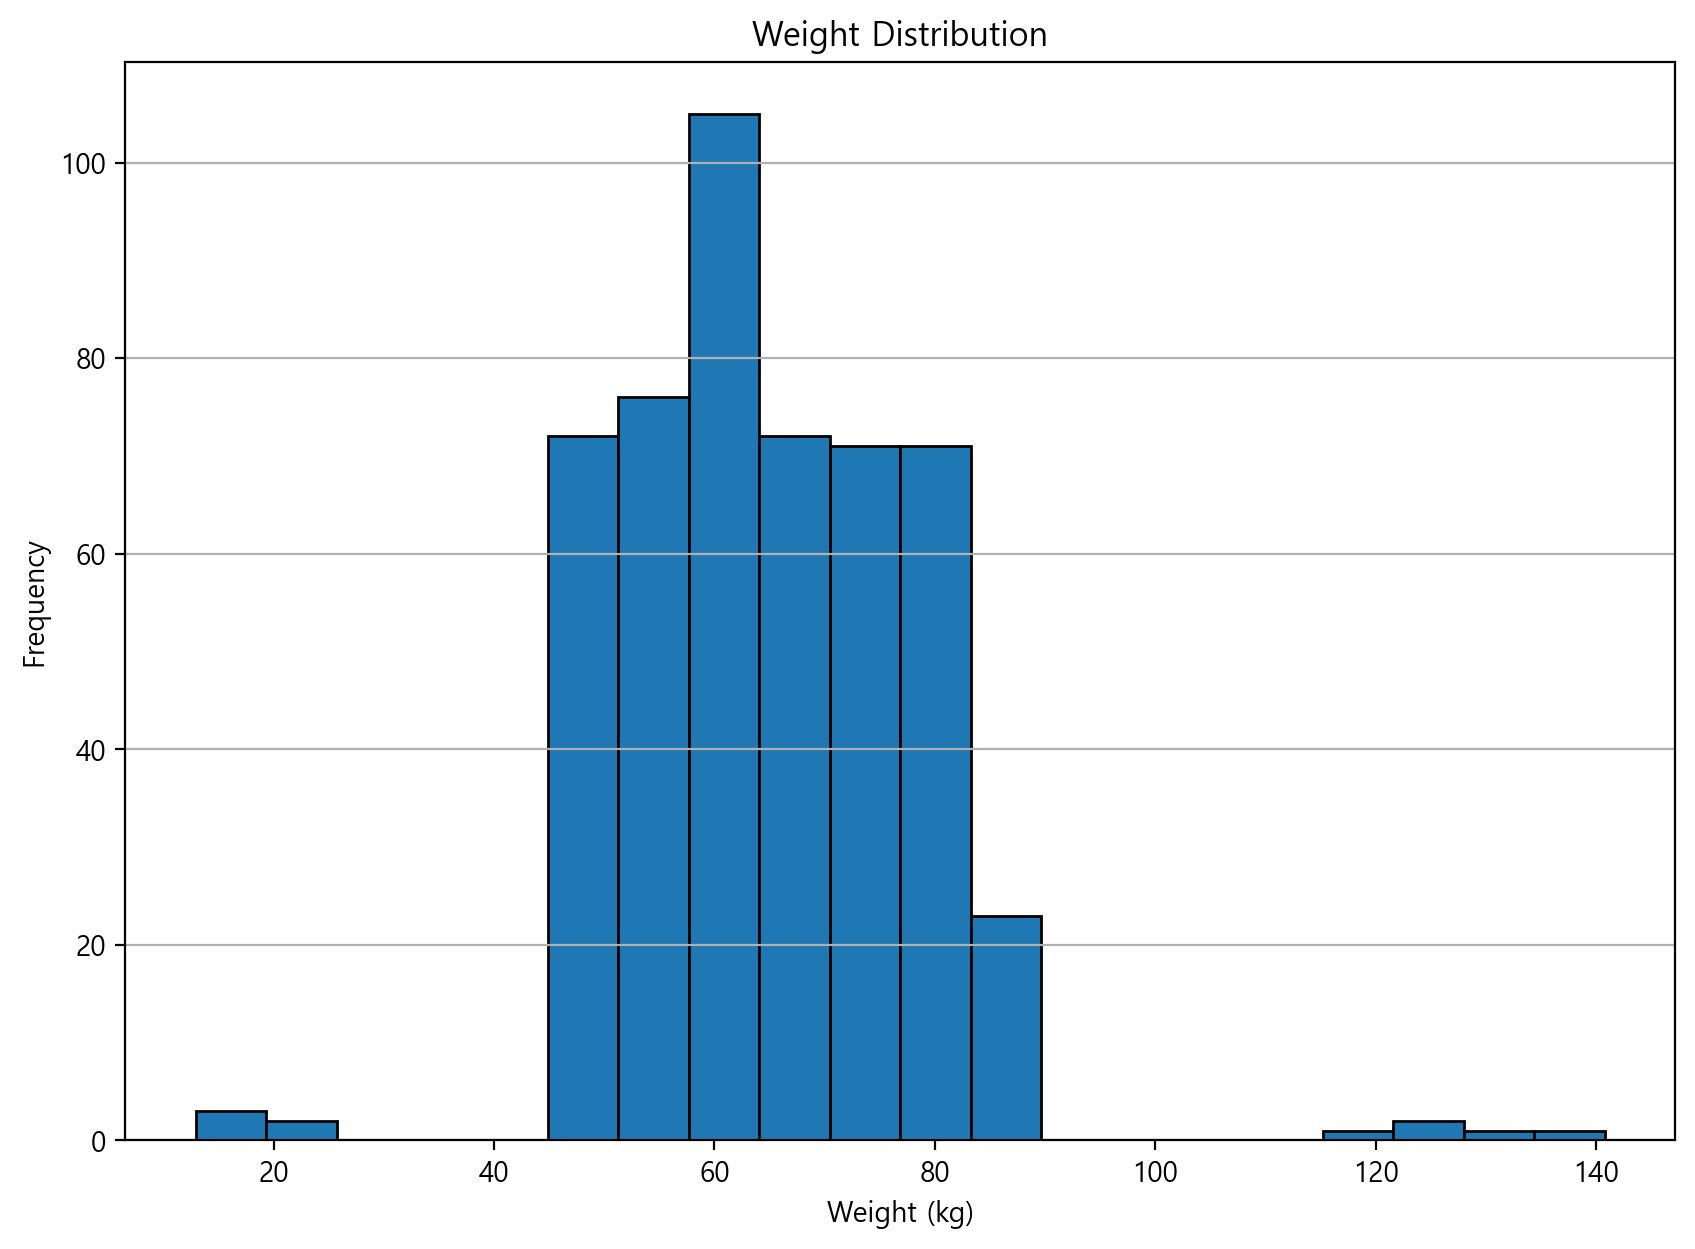

In [21]:
# 히스토그램 그리기
plt.figure(figsize=(10, 7))
plt.hist(sample_data_filled['몸무게(kg)'], bins=20, edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y')

# 그래프 보여주기
plt.show()

## 학년별 평균 키(cm)와 몸무게(kg) 계산

In [23]:
# 학년별 평균 키(cm)와 몸무게(kg) 계산
grade_means = sample_data_filled.groupby('학년')[['키(cm)', '몸무게(kg)']].mean()

# 결과 출력
print("Grade-wise Mean Height (cm) and Weight (kg):")
print(grade_means)

Grade-wise Mean Height (cm) and Weight (kg):
         키(cm)    몸무게(kg)
학년                       
1   169.715654  64.896831
2   170.005120  63.009466
3   169.876298  65.329955
4   173.799325  65.195040


## 데이터 집합에서 취미 분포를 알 수 있도록 파이차트

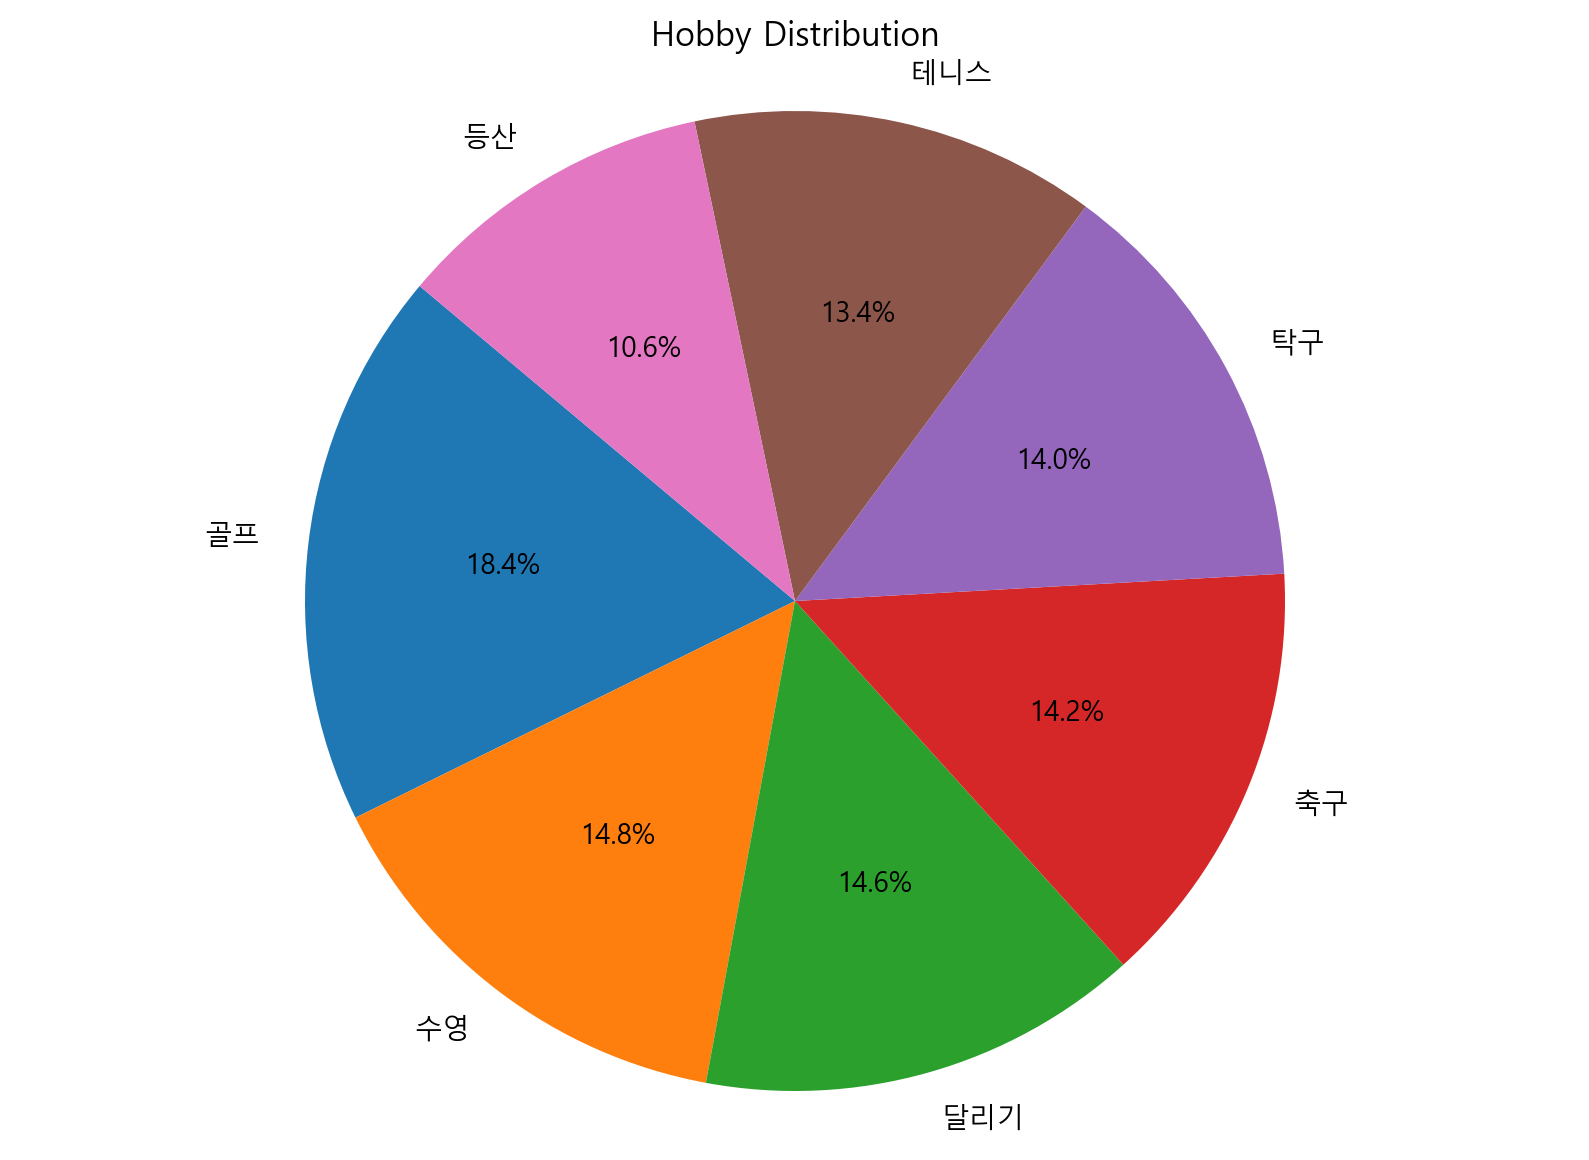

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 취미 분포 계산
hobby_distribution = sample_data_filled['취미'].value_counts()

# 파이차트 그리기
plt.figure(figsize=(10, 7))
plt.pie(hobby_distribution, labels=hobby_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Hobby Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 그래프 보여주기
plt.show()

# 회귀 대체로 결측치 처리하기

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create the dataframe 
data = {
    "Y1": [10, 12, 14, 25, 30, 34, 37, 40, 44, 49],
    
    "Y2": [15, 20, 25, 35, 45, 45, 49, 55, 60, 68],
    "Y3": [20, 30, 40, 50, 55, 60, 70, np.nan, np.nan, np.nan]
}
df = pd.DataFrame(data)

# Print the imputed dataframe
print(df)

   Y1  Y2    Y3
0  10  15  20.0
1  12  20  30.0
2  14  25  40.0
3  25  35  50.0
4  30  45  55.0
5  34  45  60.0
6  37  49  70.0
7  40  55   NaN
8  44  60   NaN
9  49  68   NaN


In [28]:
# Perform regression imputation for Y3 using Y1 and Y2
# Drop rows where Y3 is not NaN to train the model
train_data = df.dropna()

# Features and target
X_train = train_data[["Y1", "Y2"]]
y_train = train_data["Y3"]

In [29]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the missing values in Y3
missing_data = df[df["Y3"].isna()]
X_missing = missing_data[["Y1", "Y2"]]
df.loc[df["Y3"].isna(), "Y3"] = model.predict(X_missing)

# Print the imputed dataframe
print(df)

   Y1  Y2         Y3
0  10  15  20.000000
1  12  20  30.000000
2  14  25  40.000000
3  25  35  50.000000
4  30  45  55.000000
5  34  45  60.000000
6  37  49  70.000000
7  40  55  73.488741
8  44  60  79.779978
9  49  68  89.558868


In [31]:
# Extract the coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model. 

# Print the regression equation
regression_equation = f"Y3 = {intercept:.2f} + ({coefficients[0]:.2f} * Y1) + ({coefficients[1]:.2f} * Y2)"
print("Regression Equation:", regression_equation)

Regression Equation: Y3 = 5.11 + (0.21 * Y1) + (1.09 * Y2)
